In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

raw_clench_data = np.loadtxt("/content/RecordSession_2021.11.22_13.20.43.csv", delimiter = ',')


# JAW CLENCHES

In [2]:
cut_clench_data = raw_clench_data[:, 6000:]

In [3]:
def plot_intervals(arr, row, interval):
  arr_len = len(arr[row])
  num_plots = int(arr_len / interval)
  for i in range(num_plots):
    plt.plot(arr[row, i*interval:(i+1)*interval])
    plt.figure()

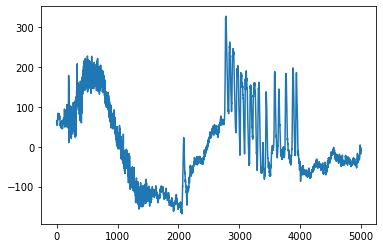

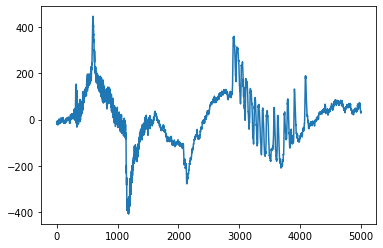

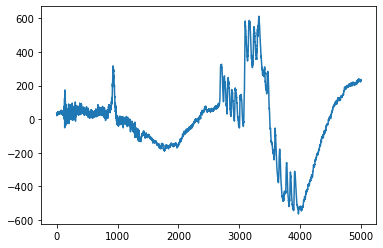

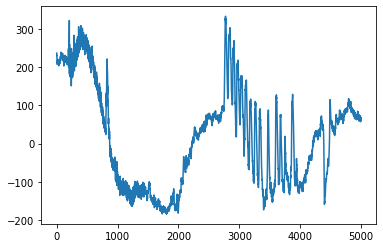

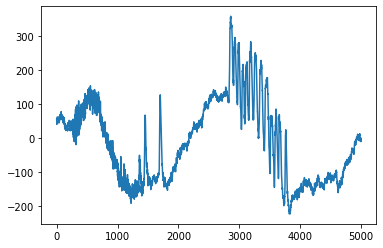

<Figure size 432x288 with 0 Axes>

In [4]:
plot_intervals(cut_clench_data, 0, 5000)

In [5]:
def plot_each_interval(arr, row, start, end, interval):
  for i in range(10):
    plt.plot(arr[row, (start + i*interval):(end + i*interval)])
    plt.title("Interval " + str(i) +  ", Row " + str(row))

    

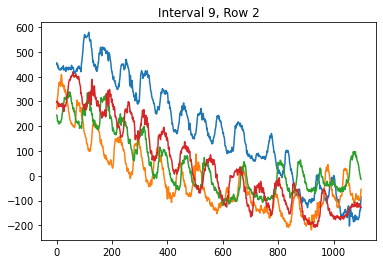

In [6]:
plot_each_interval(cut_clench_data, 2, 7800, 8900, 5000)

In [7]:
clench_truths = np.zeros(len(cut_clench_data[0]))


# Sets the given array to 1 at indices start to end multiplied by the interval
def fill_truths(arr, start, end, interval):
  num_plots = int(len(arr) / interval)
  for i in range(num_plots):
    for j in range(start + i*interval, end + i*interval):
      arr[j] = 1
    
fill_truths(clench_truths, 2700, 4000, 5000)

In [8]:
print(clench_truths)

[0. 0. 0. ... 0. 0. 0.]


Visualizing the labels

5


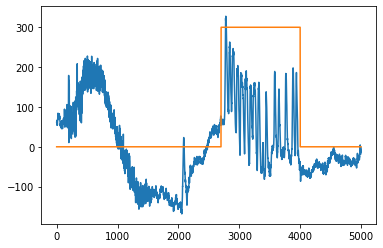

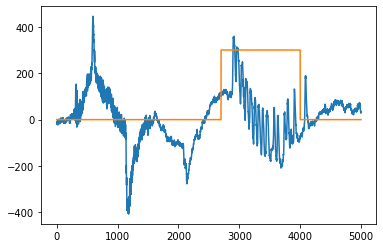

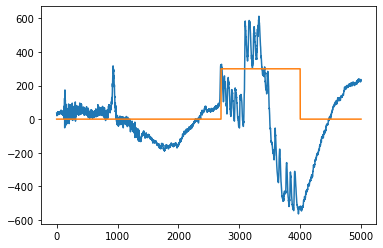

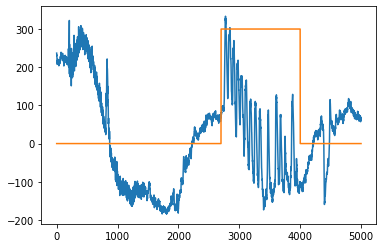

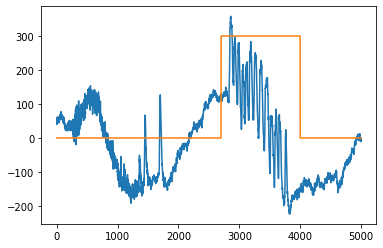

<Figure size 432x288 with 0 Axes>

In [9]:
def visualize_truths(arr, truths, row, interval):
  arr_len = len(arr[row])
  num_plots = int(arr_len / interval)
  print(num_plots)
  for i in range(num_plots):
    plt.plot(arr[row, i*interval:(i+1)*interval])
    plt.plot(truths[i*interval:(i+1)*interval]*300)
    plt.figure()
  
visualize_truths(cut_clench_data, clench_truths, 0, 5000)

In [10]:
clench_truths1 = [clench_truths]
clench_truth_data = np.append(cut_clench_data, clench_truths1, axis=0)   # Data appended to truths

# CLASSIFYING CLENCH DATA

Uses rate of change between two points

In [11]:
def find_ROC(arr, p1, p2):
  return np.abs(arr[p2] - arr[p1])

In [12]:
# INDEX 3000: Clench
# Has high ROCs


interval = 10
start = 3000
for i in range(10):
  print(find_ROC(cut_clench_data[0], start, start + interval))
  start += interval

63.113
144.644
26.440000000000012
19.169999999999987
11.359999999999985
31.27000000000001
58.992000000000004
63.51969999999999
1.7768999999999995
150.5986


In [13]:
# INDEX 1000: Clench
# Has low ROCs


interval = 10
start = 1000
for i in range(10):
  print(find_ROC(cut_clench_data[0], start, start + interval))
  start += interval

3.5130000000000017
14.326999999999998
12.771
6.6541
3.4007000000000005
29.135199999999998
2.0330000000000013
12.757000000000005
16.963000000000005
3.811


In [14]:
# Determines if a range of an array is a jaw clench based on ROC.

def is_spike(arr, point, interval, cutoff):  
  if find_ROC(arr, point - interval, point) > cutoff:
    return 1
  return 0


In [15]:
ROC_INTERVAL = 10
ROC_CUTOFF = 70
SPIKE_INTERVAL = 550
SPIKE_FREQ_CUTOFF = 60


def get_ROC_spikes(arr):
  predictions = np.zeros(len(arr))

  for i in range(ROC_INTERVAL, len(predictions)):
    predictions[i] = is_spike(arr, i, ROC_INTERVAL, ROC_CUTOFF)
  return predictions


def get_clenches(spike_arr):

  predictions = np.zeros(len(spike_arr))

  for i in range(SPIKE_INTERVAL, len(predictions)):
    sum = np.sum(spike_arr[i - SPIKE_INTERVAL:i])
    if sum >= SPIKE_FREQ_CUTOFF:
      predictions[i] = 1

  return predictions




def predict_clenches(arr):
  spikes = get_ROC_spikes(arr)
  predictions = get_clenches(spikes)
  return predictions





Visualizing Spikes

5


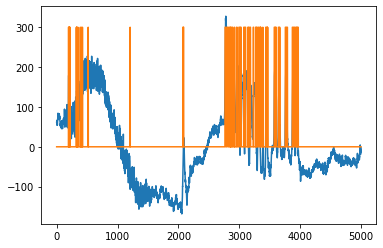

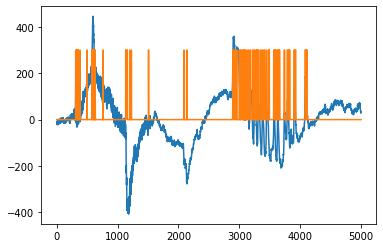

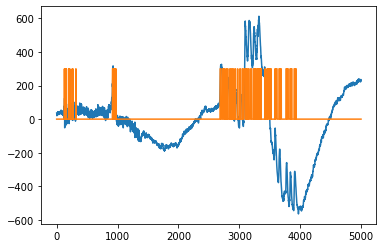

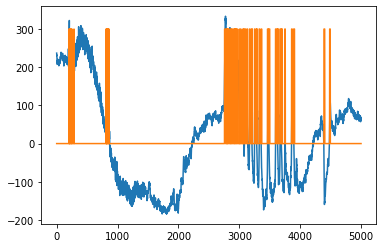

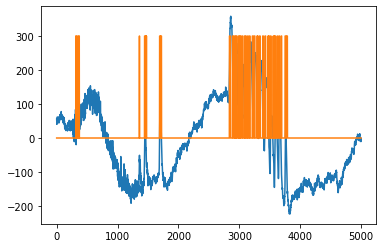

<Figure size 432x288 with 0 Axes>

In [16]:
visualize_truths(cut_clench_data, get_ROC_spikes(cut_clench_data[0]), 0, 5000)

Visualizing Predictions

5


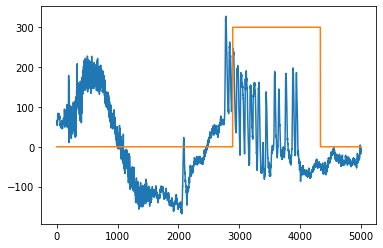

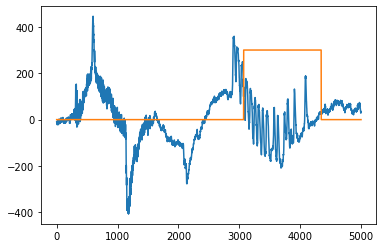

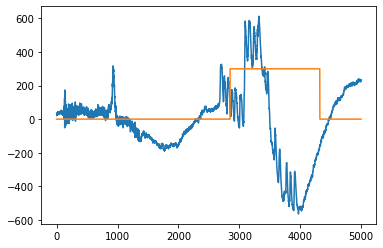

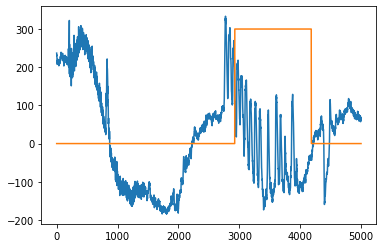

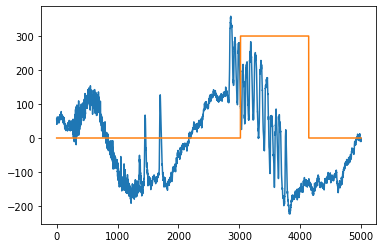

<Figure size 432x288 with 0 Axes>

In [17]:
clench_predictions = predict_clenches(cut_clench_data[0])
visualize_truths(cut_clench_data, clench_predictions, 0, 5000)

In [18]:
# truths and predictions are very aligned.
from sklearn import metrics

acc = metrics.accuracy_score(clench_predictions, clench_truths, normalize=True)
print(acc)

0.8986220472440944


In [19]:
np.savetxt('clench_labeled_data.csv', clench_truth_data, delimiter=',')

# EYE BLINKS

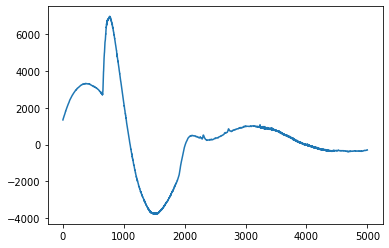

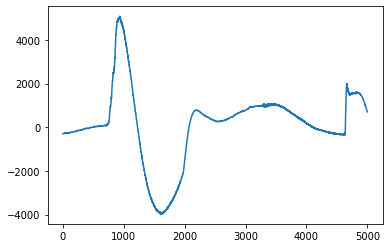

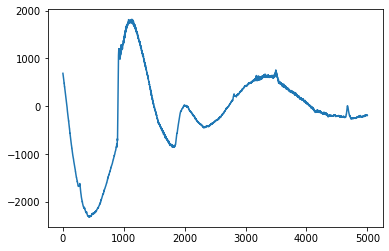

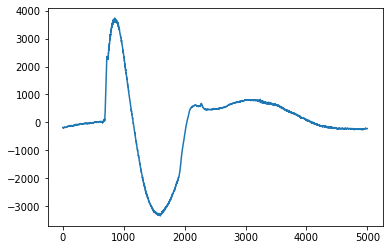

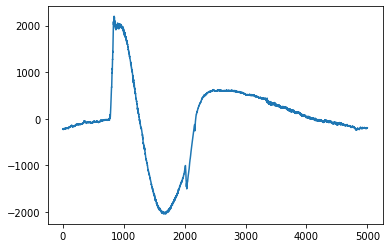

<Figure size 432x288 with 0 Axes>

In [20]:
raw_blink_data = np.loadtxt("/content/RecordSession_2021.11.22_13.24.37.csv", delimiter = ',')

cut_blink_data = raw_blink_data[:, 3000:]

plot_intervals(cut_blink_data, 0, 5000)

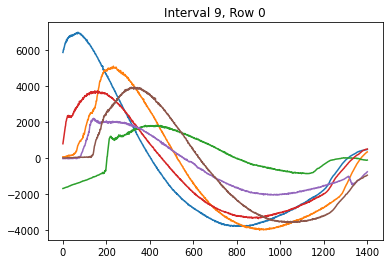

In [21]:
plot_each_interval(cut_blink_data, 0, 700, 2100, 5000)

In [22]:
blink_truths = np.zeros(len(cut_blink_data[0]))

fill_truths(blink_truths, 700, 2100, 5000)

blink_truths1 = [blink_truths]
blink_truth_data = np.append(cut_blink_data, blink_truths1, axis=0)   # Data appended to truths

5


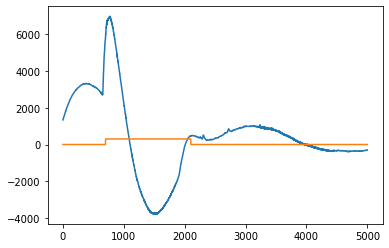

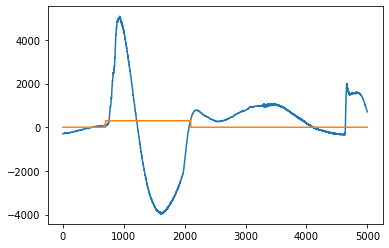

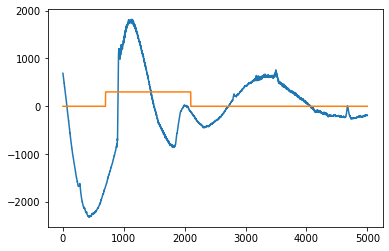

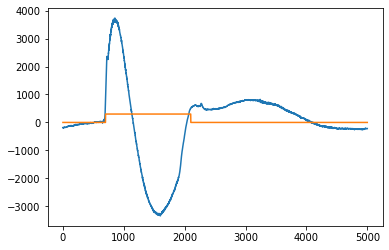

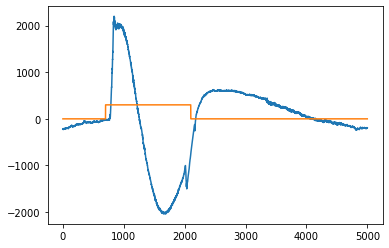

<Figure size 432x288 with 0 Axes>

In [23]:
visualize_truths(cut_blink_data, blink_truths, 0, 5000)

# CLASSIFYING BLINK DATA

In [24]:
BLINK_TOP = 1500
BLINK_BOTTOM = -1900
BLINK_INTERVAL = 1000
BLINK_FREQ_CUTOFF = 2

def is_blink(value):
  if np.logical_or(value > BLINK_TOP, value < BLINK_BOTTOM):
    return 1
  return 0 

def get_blink_spikes(arr):
  predictions = np.zeros(len(arr))

  for i in range(len(predictions)):
    predictions[i] = is_blink(arr[i])
  return predictions


# NOT USED
def get_blinks(spike_arr):
  blink_predictions_2 = np.zeros(len(spike_arr))

  for i in range(BLINK_INTERVAL, len(blink_predictions_2)):
    sum = np.sum(spike_arr[i - BLINK_INTERVAL:i])
    if sum >= BLINK_FREQ_CUTOFF:
      blink_predictions_2[i] = 1

  return blink_predictions_2

def predict_blinks(arr):
  spikes = get_blink_spikes(arr)
  #predictions = get_blinks(spikes)
  return spikes


5


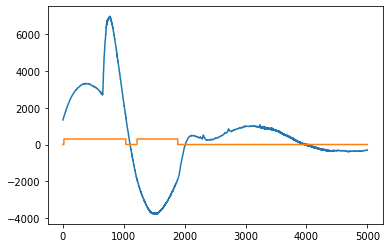

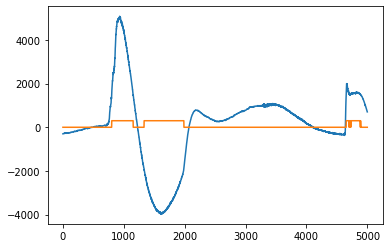

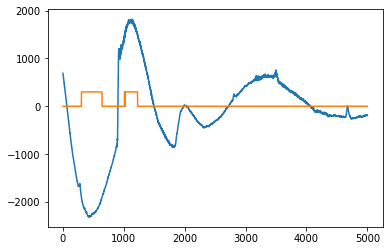

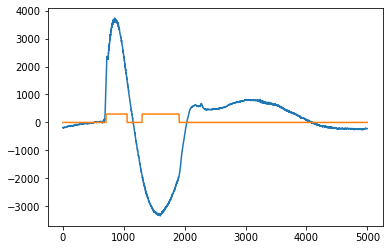

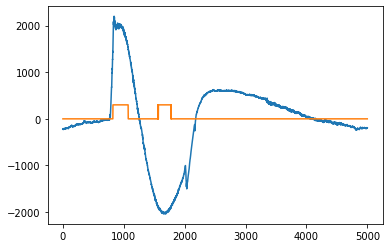

<Figure size 432x288 with 0 Axes>

In [25]:
visualize_truths(cut_blink_data, get_blink_spikes(cut_blink_data[0]), 0, 5000)

# CLASSIFYING MIXED DATA

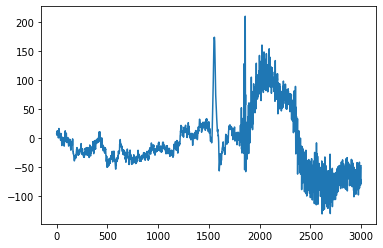

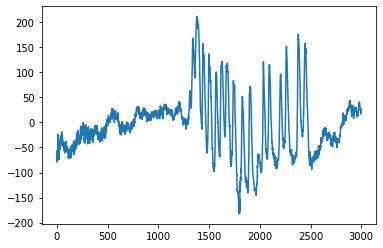

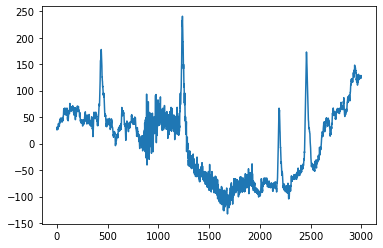

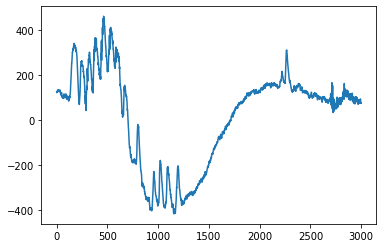

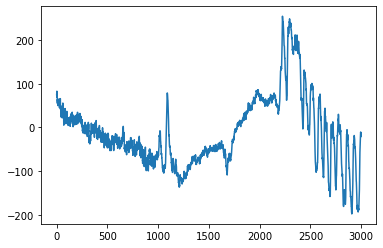

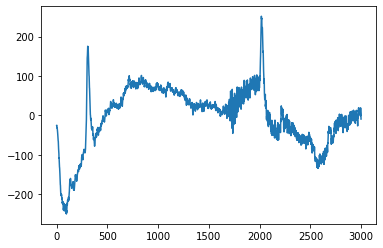

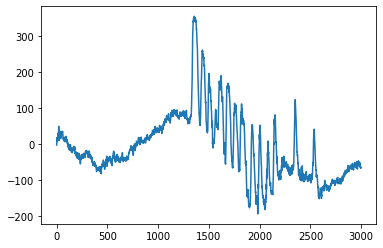

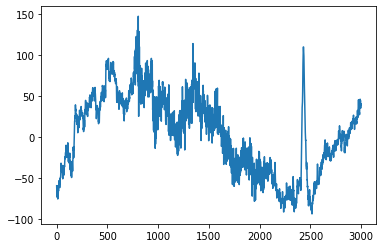

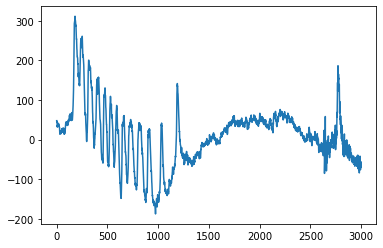

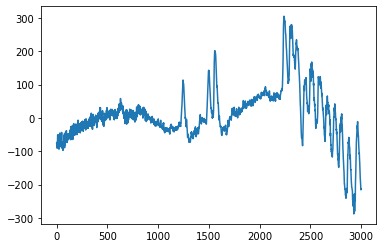

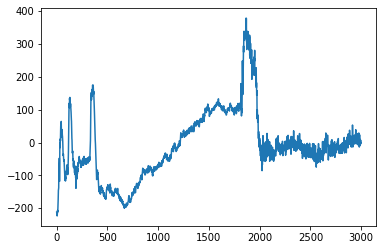

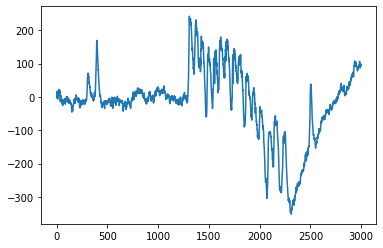

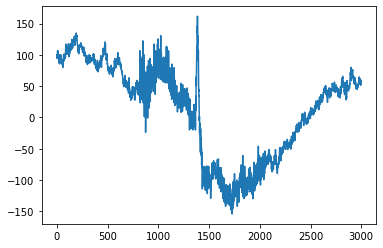

<Figure size 432x288 with 0 Axes>

In [26]:
raw_mixed_data = np.loadtxt("/content/RecordSession_2021.11.22_13.38.42.csv", delimiter = ',')

cut_mixed_data = raw_mixed_data[:, 7000:]

plot_intervals(cut_mixed_data, 0, 3000)

13


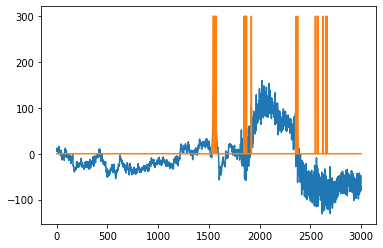

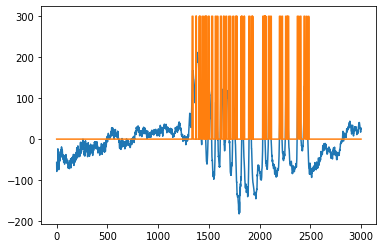

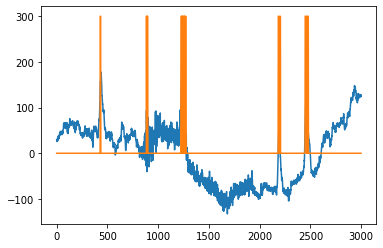

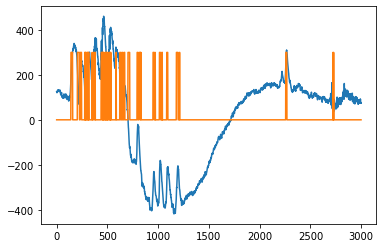

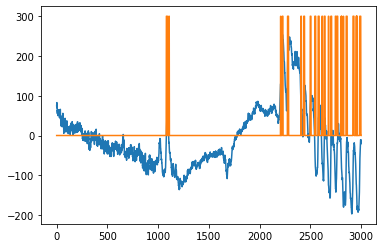

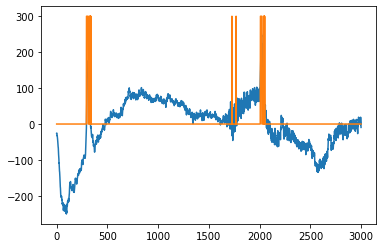

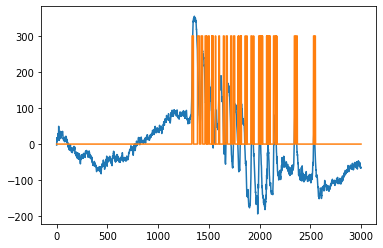

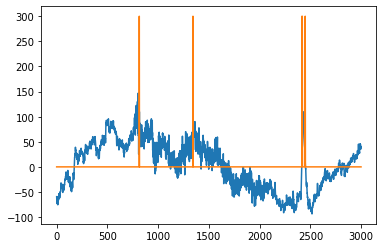

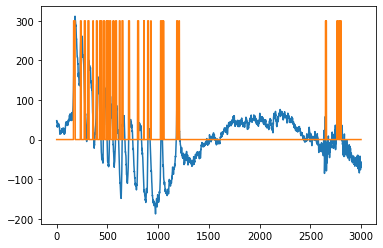

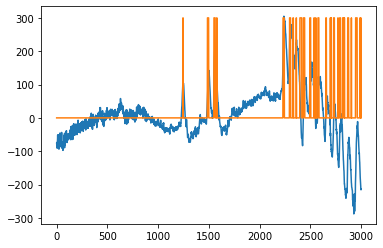

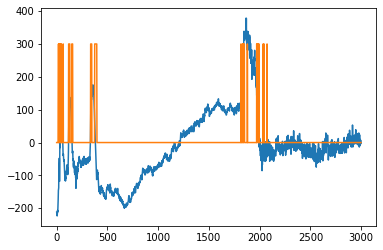

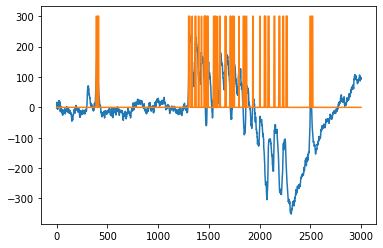

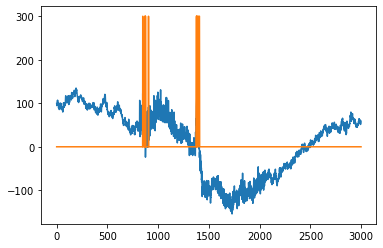

<Figure size 432x288 with 0 Axes>

In [27]:
visualize_truths(cut_mixed_data, get_ROC_spikes(cut_mixed_data[0]), 0, 3000)

13


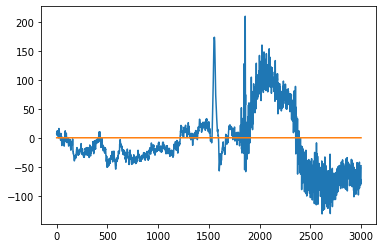

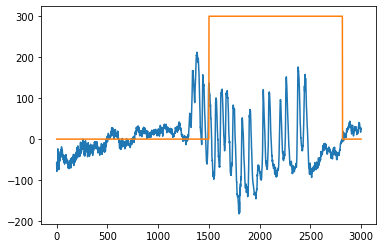

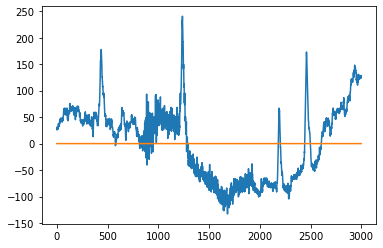

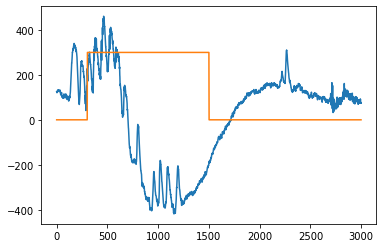

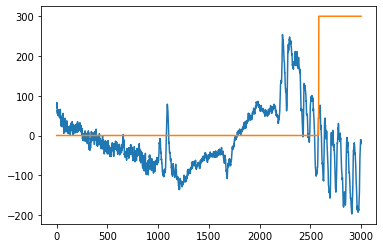

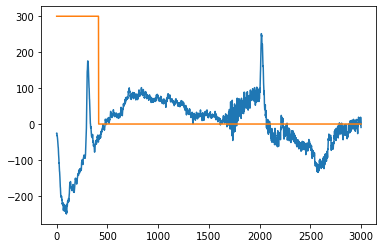

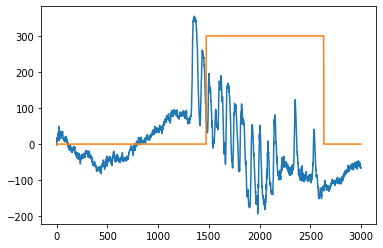

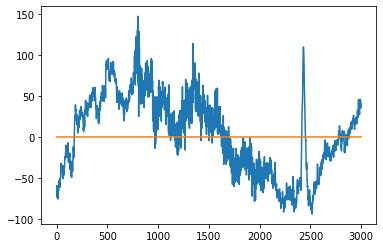

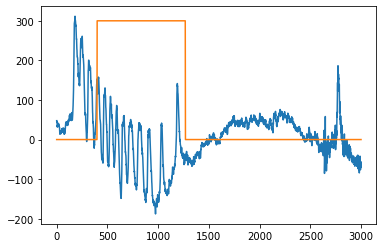

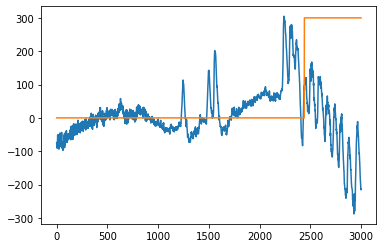

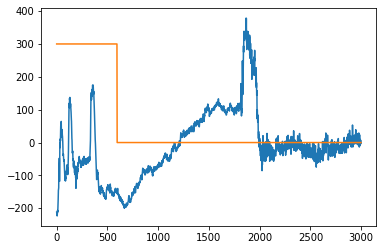

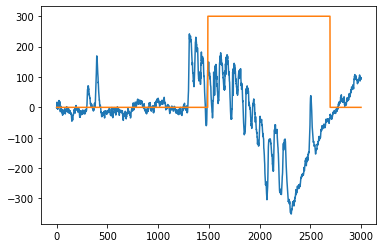

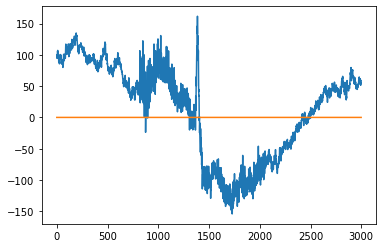

<Figure size 432x288 with 0 Axes>

In [28]:
mixed_clench_predictions = predict_clenches(cut_mixed_data[0])
visualize_truths(cut_mixed_data, mixed_clench_predictions, 0, 3000)

13


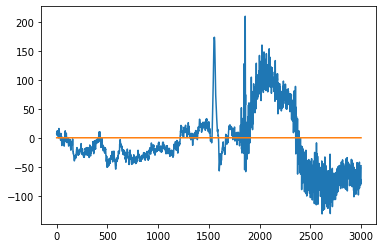

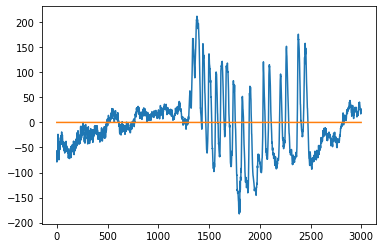

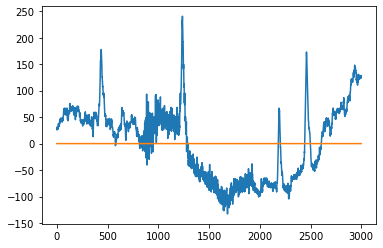

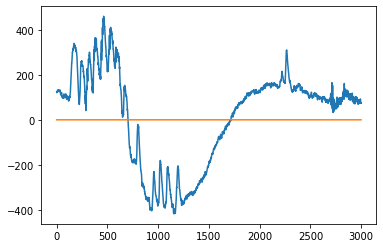

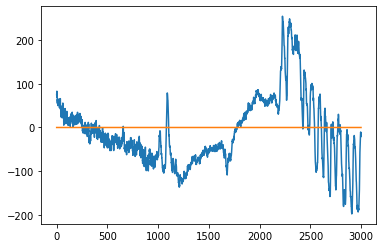

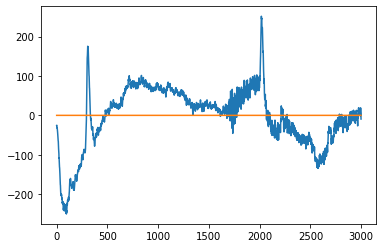

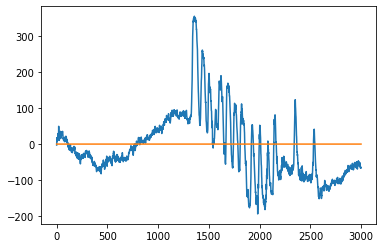

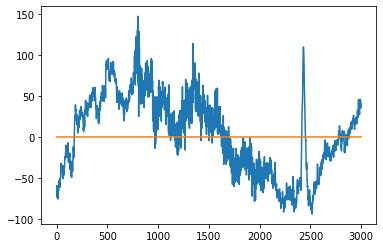

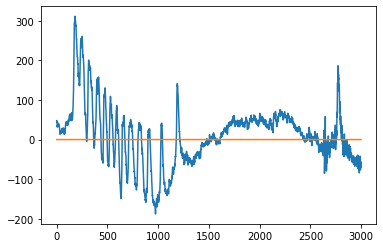

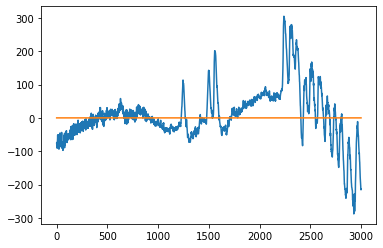

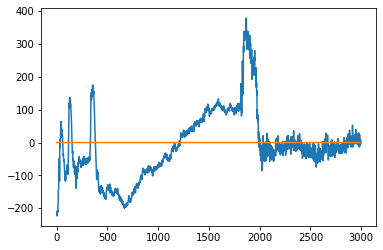

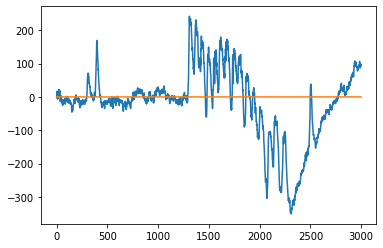

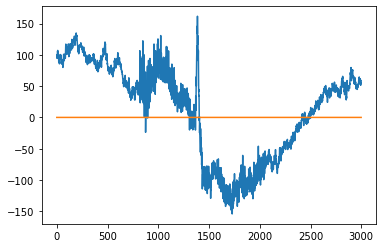

<Figure size 432x288 with 0 Axes>

In [29]:
visualize_truths(cut_mixed_data, get_blink_spikes(cut_mixed_data[0]), 0, 3000)